In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


(60000, 28, 28)
(60000,)


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

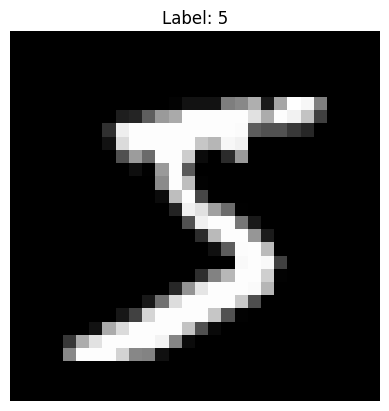

In [3]:
print(x_train.shape)
print(y_train.shape)

plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.axis('off')


In [4]:
# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape for CNN
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [7]:
model.fit(
    x_train,
    y_train,
    epochs=5,
    validation_split=0.1
)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9049 - loss: 0.3077 - val_accuracy: 0.9857 - val_loss: 0.0536
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9858 - loss: 0.0448 - val_accuracy: 0.9892 - val_loss: 0.0384
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9906 - loss: 0.0271 - val_accuracy: 0.9848 - val_loss: 0.0504
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9941 - loss: 0.0186 - val_accuracy: 0.9898 - val_loss: 0.0380
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9964 - loss: 0.0119 - val_accuracy: 0.9890 - val_loss: 0.0482


In [8]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9867 - loss: 0.0394
Test Accuracy: 0.9900000095367432


In [9]:
prediction = model.predict(x_test[0].reshape(1,28,28,1))
predicted_digit = np.argmax(prediction)
print("Predicted Digit:", predicted_digit)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step
Predicted Digit: 7


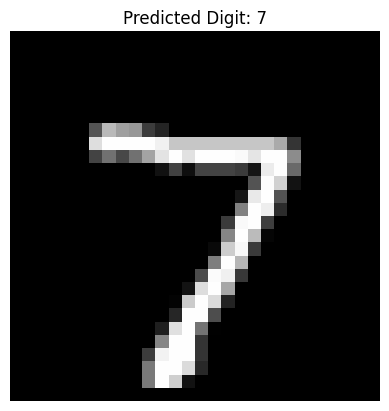

In [10]:
plt.imshow(x_test[0].reshape(28,28), cmap='gray')
plt.title(f"Predicted Digit: {predicted_digit}")
plt.axis('off')
plt.show()


In [11]:
model.save("digit_recognition_cnn.h5")


In [53]:
from google.colab import files
uploaded = files.upload()


Saving digit1.jpeg to digit1 (2).jpeg


In [54]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image in grayscale
img = cv2.imread(list(uploaded.keys())[0], cv2.IMREAD_GRAYSCALE)

# Resize larger first (important for thin digits)
img = cv2.resize(img, (100, 100))

# Gaussian blur to remove noise
img = cv2.GaussianBlur(img, (5,5), 0)

# Adaptive threshold (better than normal threshold)
img = cv2.adaptiveThreshold(
    img, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    11, 2
)

# Invert colors (MNIST style)
img = cv2.bitwise_not(img)

# Find bounding box of digit
coords = cv2.findNonZero(img)
x, y, w, h = cv2.boundingRect(coords)
img = img[y:y+h, x:x+w]

# Resize to MNIST size
img = cv2.resize(img, (28, 28))

# Normalize
img = img / 255.0

# Reshape for CNN
img = img.reshape(1, 28, 28, 1)



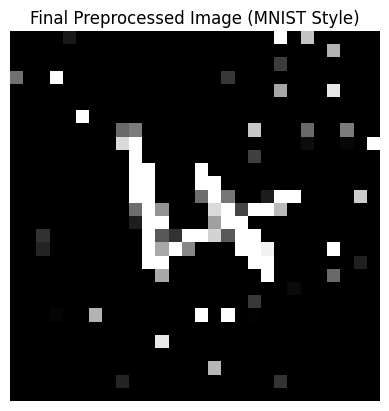

In [55]:
plt.imshow(img.reshape(28,28), cmap='gray')
plt.title("Final Preprocessed Image (MNIST Style)")
plt.axis('off')
plt.show()


In [56]:
prediction = model.predict(img)
predicted_digit = np.argmax(prediction)

print("Predicted Digit:", predicted_digit)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted Digit: 4
